In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [10]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/개발_전처리/iOS개발.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
1,iOS APP 서비스의 분석 및 개발 테스트 및 지속적인 최적화를 담당합니다 UX...,Swift로 개발 가능하신 분 iOS 앱 개발과 유지보수 배포 경험이 1년 이상 ...
2,광고 SDK 개발 및 유지보수 인하우스 서비스 iOS 개발,컴퓨터공학 전산학 수학 등 직무 관련 전공자 유관 경력 3년 이상 1차 면접에서 ...
3,React Native 기반 앱 퍼블리싱 및 프론트엔드 작업 javascript ...,React Native 앱 개발 프로젝트 최소 3건 이상 애니메이션 적용 경험 파...
4,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...
...,...,...
86,OnDevice 기반 마이데이터 거래 플랫폼 및 어플리케이션 개발Android 자...,Android 3년 이상 Android 개발 경험을 보유한 자기 주도적인 성향의 개...
87,비사이드코리아의 어플리케이션 개발 및 배포 테스트 작성 및 여러 개발자들이 협업하...,컴퓨터 공학 관련 학위를 소지하거나 Flutter 개발 경험이 있으신 분 탄탄한 ...
88,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...,Cloud Server 개발 및 운영 경험 AWSEC2 Auto Scale Clo...
89,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...,JAVA 안드로이드 IOS 앱개발 웹개발 프로토콜 설계 등 분야별 능통자 핀테크 ...


In [11]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...
1,iOS APP 서비스의 분석 및 개발 테스트 및 지속적인 최적화를 담당합니다 UX...
2,광고 SDK 개발 및 유지보수 인하우스 서비스 iOS 개발
3,React Native 기반 앱 퍼블리싱 및 프론트엔드 작업 javascript ...
4,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...
...,...
86,OnDevice 기반 마이데이터 거래 플랫폼 및 어플리케이션 개발Android 자...
87,비사이드코리아의 어플리케이션 개발 및 배포 테스트 작성 및 여러 개발자들이 협업하...
88,신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시...
89,전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring ...


In [12]:
#txt로 저장
i = 'C:/Users/User/Desktop/개발_전처리/iOS개발(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [13]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 신규 개발 프로젝트 기획 및 설계 신규 개발 프로젝트 개발 진행 관리 빌드 점검시연 QA 론칭 BtoC 라이브 서비스 유지보수 관리 서버클라이언트 개발 및 운영 관리 형상 관리 통합빌드 배포 소스품질 관리 외부 개발업체 발굴 평가 개발진행관리\n iOS APP 서비스의 분석 및 개발 테스트 및 지속적인 최적화를 담당합니다 UX 디자이너와 협업하여 화면 디자인 및 프로세스에 대해 논의합니다 APP 개발 워크플로를 연구하고 개선합니다\n 광고 SDK 개발 및 유지보수 인하우스 서비스 iOS 개발\n React Native 기반 앱 퍼블리싱 및 프론트엔드 작업 javascript 혹은 Typescript 기반의 RN 앱 개발\n 전자영수증 솔루션 고도화 빅데이터AI 연구 개발사용 기술Java Spring   jQuery  JavaScript  Flutter    React Native  BigData  AI인공지능  Apache Tomcat\n UXP에서 담당하는 뱅크샐러드의 네이티브 기능 개발을 진행합니다 뱅크샐러드의 주요 제품인 홈 가계부 종알림 화면을 개선하고 새로운 기능을 추가합니다 Push Notification 딥링크 관련 기능을 개선하여 유저가 기능을 빠르고 쉽게 접근할 수 있도록 합니다 개발 생산성 작업을 담당합니다 Web과 Native 간의 interface를 유지보수하여 WebView 기반의 서비스를 안정적으로 운영할 수 있도록 합니다 프로젝트 내 같은 관심사를 갖는 코드의 모듈화 작업을 진행합니다 iOS Chapter 내 코드리뷰에 참여하여 코드 퀄리티 향상에 기여하고 기술 토론을 통해 Best Practice 를 논의하여 개발 생산성을 향상시킵니다 뱅크샐러드 iOS 엔지니어 iOS Engineer는 아래의 \n Android 앱 개발 iOS 앱 개발 Web 개발 서버개발\n 청소로봇 APP개발 및 유지보수  클라이언트 요구사항에 따른 어플리케이션 구현   IT 전문가 팀과 협력하여 새로운 어플리케이션의 사양 설정  사양에 따라 

In [14]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '신규',
 '개발',
 '프로젝트',
 '기획',
 '및',
 '설계',
 '신규',
 '개발',
 '프로젝트',
 '개발',
 '진행',
 '관리',
 '빌드',
 '점검',
 '시연',
 '론칭',
 '라이브',
 '서비스',
 '유지',
 '보수',
 '관리',
 '서버',
 '클라이언트',
 '개발',
 '및',
 '운영',
 '관리',
 '형상',
 '관리',
 '통합',
 '빌드',
 '배포',
 '소스',
 '품질',
 '관리',
 '외부',
 '개발',
 '업체',
 '발굴',
 '평가',
 '개발',
 '진행',
 '관리',
 '서비스',
 '분석',
 '및',
 '개발',
 '테스트',
 '및',
 '지속',
 '최적화',
 '담당',
 '디자이너',
 '협업',
 '화면',
 '디자인',
 '및',
 '프로세스',
 '대해',
 '논의',
 '개발',
 '워크플로',
 '연구',
 '개선',
 '광고',
 '개발',
 '및',
 '유지',
 '보수',
 '인하',
 '우스',
 '서비스',
 '개발',
 '기반',
 '앱',
 '퍼블리싱',
 '및',
 '프론트엔드',
 '작업',
 '기반',
 '앱',
 '개발',
 '전자',
 '영수증',
 '솔루션',
 '고도화',
 '빅데이터',
 '연구',
 '개발',
 '사용',
 '기술',
 '인공',
 '지능',
 '담당',
 '뱅크',
 '샐러드',
 '네이티',
 '브',
 '기능',
 '개발',
 '진행',
 '뱅크',
 '샐러드',
 '주요',
 '제품',
 '홈',
 '가계부',
 '종',
 '알림',
 '화면',
 '개선',
 '기능',
 '추가',
 '딥',
 '링크',
 '관련',
 '기능',
 '개선',
 '유저',
 '기능',
 '접근',
 '수',
 '개발',
 '생산',
 '작업',
 '담당',
 '과',
 '간의',
 '를',
 '유지',
 '보수',
 '기반',
 '서비스',
 '안정',
 '운영',
 '수',
 '프로젝트',
 '내',
 

In [15]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

2276
499


FreqDist({'개발': 191, '및': 106, '앱': 86, '기능': 52, '서비스': 51, '관리': 35, '유지': 31, '보수': 31, '코드': 31, '수': 27, ...})

In [16]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [19]:
stop_words = [
    '서비스','개발','사용','이해','기반','필수','가능','우대','경험','관심','활용','관련','능력','이해도','대한','보유','이상','실행','디지털','제안','플루','인','제작','수립','신규','업무','사','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '프로젝트',
 '기획',
 '설계',
 '프로젝트',
 '진행',
 '관리',
 '빌드',
 '점검',
 '시연',
 '론칭',
 '라이브',
 '유지',
 '보수',
 '관리',
 '서버',
 '클라이언트',
 '운영',
 '관리',
 '형상',
 '관리',
 '통합',
 '빌드',
 '배포',
 '소스',
 '품질',
 '관리',
 '외부',
 '업체',
 '발굴',
 '평가',
 '진행',
 '관리',
 '분석',
 '테스트',
 '지속',
 '최적화',
 '담당',
 '디자이너',
 '협업',
 '화면',
 '디자인',
 '프로세스',
 '대해',
 '논의',
 '워크플로',
 '연구',
 '개선',
 '광고',
 '유지',
 '보수',
 '인하',
 '우스',
 '앱',
 '퍼블리싱',
 '프론트엔드',
 '작업',
 '앱',
 '전자',
 '영수증',
 '솔루션',
 '고도화',
 '빅데이터',
 '연구',
 '기술',
 '인공',
 '지능',
 '담당',
 '뱅크',
 '샐러드',
 '네이티',
 '브',
 '기능',
 '진행',
 '뱅크',
 '샐러드',
 '주요',
 '제품',
 '홈',
 '가계부',
 '종',
 '알림',
 '화면',
 '개선',
 '기능',
 '추가',
 '딥',
 '링크',
 '기능',
 '개선',
 '유저',
 '기능',
 '접근',
 '생산',
 '작업',
 '담당',
 '과',
 '간의',
 '를',
 '유지',
 '보수',
 '안정',
 '운영',
 '프로젝트',
 '관심사',
 '코드',
 '모듈',
 '작업',
 '진행',
 '코드',
 '리뷰',
 '참여',
 '코드',
 '퀄리티',
 '향상',
 '기여',
 '기술',
 '토론',
 '통해',
 '를',
 '논의',
 '생산',
 '향상',
 '뱅크',
 '샐러드',
 '엔지니어',
 '아래',
 '앱',
 '앱',
 '서버',
 '청소',
 '로봇',
 '유지',
 '보수',
 '클라이언트',
 '요구사항',
 '어플리케이션',
 '구현'

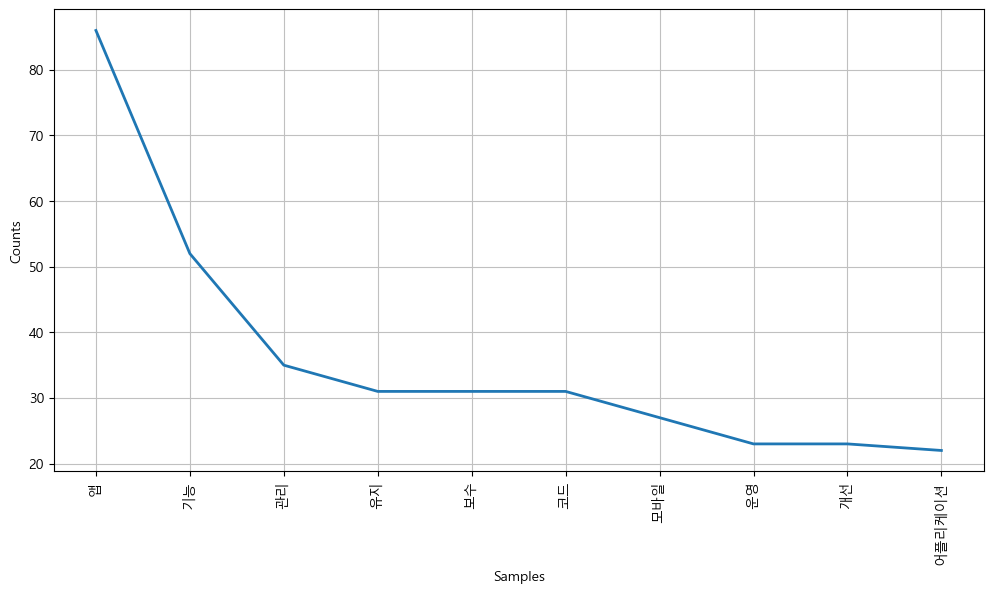

In [20]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

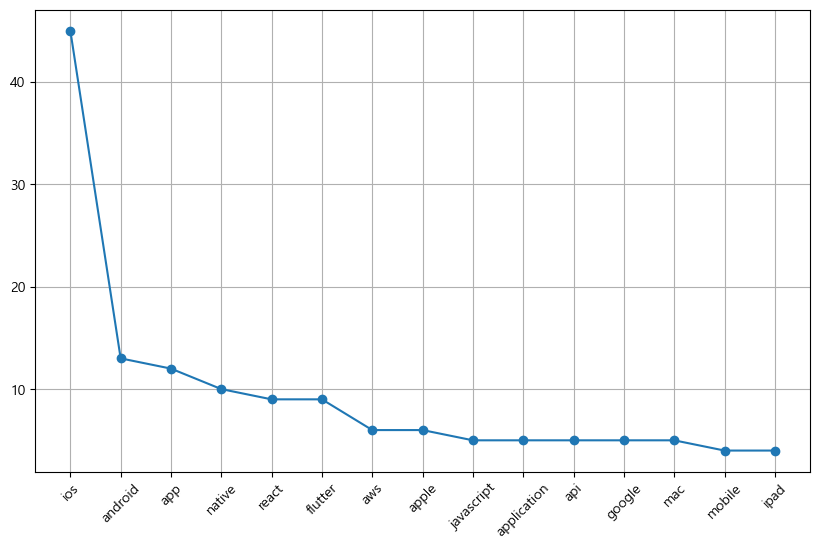

In [23]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['restful','play','open','pg']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)